# Exploratory Data Analysis (EDA)

## 1. Understanding Data Context
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status We will start with basic exploratory data analysis (EDA), followed by applying some simple predictie modelling.

Please focus on understanding the high-level concepts first before figuring out the details of the code (you will get used to the coding part with practice).

- Sections labeled **Exercises** are self-practice sections (with help from your trainer). You can use the results of these sections for your report.
- Similarly, there are suggestive questions throughout the report that might take deeper investigation and thought. Your answers would be useful for both your reports and future job interviews



In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


We will upload file `healthcare-dataset-stroke-data.csv` to a directory called `DataCamp` on your Google Drive

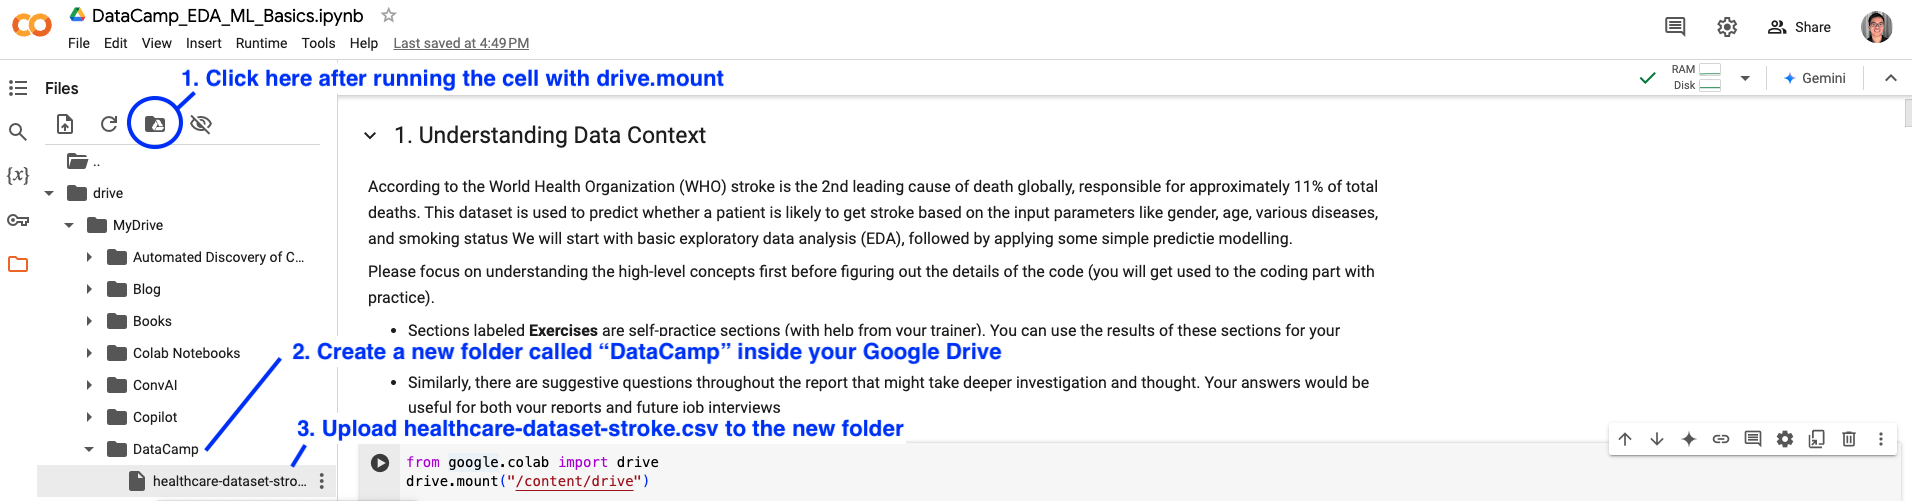

### Import libraries

In [ ]:
# Import relevant libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Change the path to point to your data location
filepath = "/content/drive/MyDrive/DataCamp/healthcare-dataset-stroke-data.csv"

# Read the CSV file into a Pandas DataFrame
stroke_data = pd.read_csv(filepath)

# Print the DataFrame
print(stroke_data)


         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  former

In [ ]:
stroke_data.shape

(5110, 12)

In [ ]:
stroke_data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
stroke_data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [ ]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB



Each row in the data provides relavant information about the patient.

1. id: unique identifier
2. gender: "Male", "Female" or "Other"
3. age: age of the patient
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. ever_married: "No" or "Yes"
7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. stroke: 1 if the patient had a stroke or 0 if not

- Note: "Unknown" in smoking_status means that the information is unavailable for this patient

**Exercises:**
- Which columns are numerical and which ones are categorical?
- Why is it important to analyze numerical and non-numerical columns separatey?

# 2. Formulate Data Questions (Hypothesis)

- What interesting insights can be gained from data?
- What questions can be interesting to the stakeholders?

# 3. Exploratory Data Analysis

Before we start, let's revise some concepts related to distributions:
- What is a distribution?
- What is the range of a distribution?
- What are  quartiles and inter-quartile range?
- What are mean, mode, medians values?

## Check for missing values
Why? Missing values is number one problem with a dataset because it affects almost every aspect of your downstream analysis. For example:

1. Missing values can affect all your descriptive statistics (think about how missing values can affect the "mode" of a column)
2. Missing values would also affect the quality (generalization) of predictive models


In [ ]:
stroke_data.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


Only "bmi" has some missing values. Let's see the percentage of missing values for "bmi"

In [ ]:
# Ratio of missing null values
# (number of missing BMI values ) / (number of rows)
(stroke_data["bmi"].isnull().sum()/stroke_data.shape[0]) * 100

3.9334637964774952

Ratio of missing values of bmi is 3.93%

Optional: create a new dataframme with missing value counts to plot. There are other ways to visualize this statistics, this is just to practice dataframe manipulation)

In [ ]:
missing_data_count = {'Missing': [stroke_data["bmi"].isnull().sum()], 'Not Missing': [stroke_data["bmi"].notnull().sum()]}
missing_bmi = pd.DataFrame(data=missing_data_count)

In [ ]:
missing_bmi

,Missing,Not Missing
0,201,4909


<Axes: >

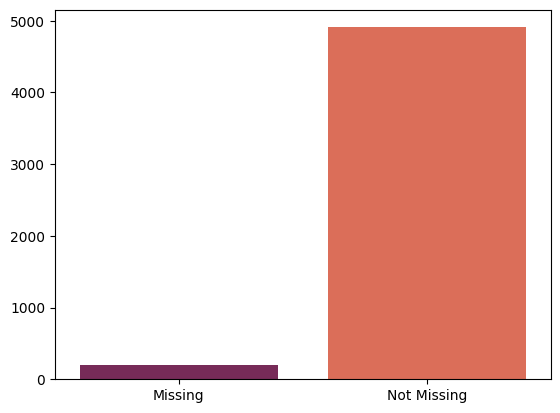

In [ ]:
# Plotting the missing values
sns.barplot(data=missing_bmi , palette="rocket")

### Dealling with Categorical and Numerical Variables

col_names() - This a function created to get the columns names that has categorical and numerical data separately

In [ ]:
def col_names(df):
    # Get categorical Variables
    cat_cols = [col for col in df.columns if df[col].dtypes not in ["int64", "float64"]]
    # Get numerical Variables
    num_cols = [col for col in df.columns if df[col].dtypes in ["int64", "float64"]]
    # Get Numerical but Categorical Variables
    num_but_cat = [col for col in num_cols if df[col].nunique() < 10]
    # Adding num_but_cat to cat_cols
    cat_cols = num_but_cat + cat_cols
    # num_but_cat removing from num_cols
    num_cols = [col for col in num_cols if col not in num_but_cat]
    print(f"Numerical Cols: {num_cols} \nCategorical Cols: {cat_cols} \nNumerical but Categorical: {num_but_cat}")
    return num_cols, cat_cols

In [ ]:
numerical_cols, categorical_cols = col_names(stroke_data)

Numerical Cols: ['id', 'age', 'avg_glucose_level', 'bmi'] 
Categorical Cols: ['hypertension', 'heart_disease', 'stroke', 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'] 
Numerical but Categorical: ['hypertension', 'heart_disease', 'stroke']


### Analysing Numerical Attributes

In [ ]:
# what are the columns of table below
stroke_data[numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60


<Axes: xlabel='age', ylabel='Count'>

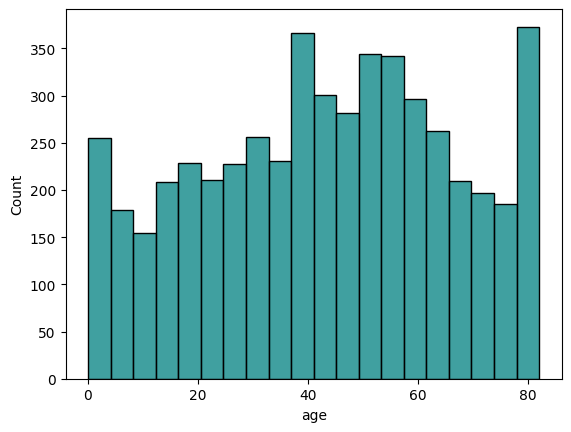

In [ ]:
# Visuealize each attribute
sns.histplot(x=stroke_data["age"], data=stroke_data, color="teal")

**Exercises:**
- Can you plot the histograms of other numerical columns?
- Can you show the plots of "age", "avg_glucose_level", "bmi" side by side, i.e. 3 plots on the same row?
- Can you show customize the axes of the plots to show "Age" , "Average Gluscose Level", "BMI" on the x-axes?
- References:
  - https://seaborn.pydata.org/generated/seaborn.histplot.html
  - https://www.w3schools.com/python/matplotlib_histograms.asp  

## Check for Outliers
Outliers are another "defect" in the data that need "correction":
- Outliers can significantly affect some statistics of a distribution, which can affect both your interpretations + how you fix missing data. Can you figure out why is that so?
- Outliers can significantly affect predictive models. Can you figure out why it is so?


<Axes: xlabel='bmi'>

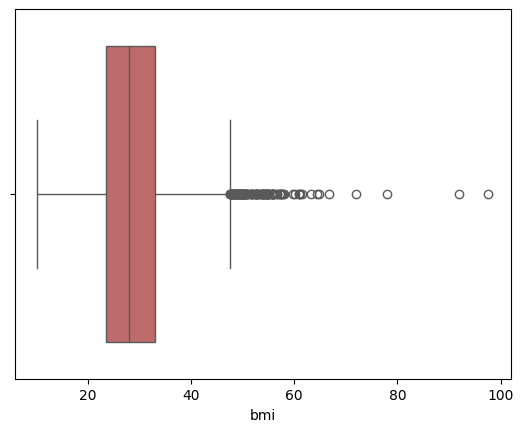

In [ ]:
# Checking for outliers of "BMI"
sns.boxplot(x=stroke_data["bmi"], data=stroke_data, color="indianred")

What do the box, "whiskers", and dots indicate?

**Exercises:**
- Can you plot the histograms of other numerical columns?
- Can you show the box plots of "age", "avg_glucose_level", "bmi" side by side, i.e. 3 plots on the same row, each plot is vertically-oriented instead of the default horizontal orientation
- References:
  - https://seaborn.pydata.org/generated/seaborn.boxplot.html
  - https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/

#### [Extra] Checking for Outliers in Numerical Attributes

IQR (Interqartile range) is being used to check for outliers. There are other methods to do this, this snippet is mainly to practice the concept of functions in Python.

check_outliers() -  This function will return the columns with outliers

In [ ]:
def check_outliers(df, numerical_cols, iqr=1.5, low_threshold=0.1, up_threshold=0.9):
    outlier_cols = []
    for col in numerical_cols:
        q1 = df[col].quantile(low_threshold)
        q3 = df[col].quantile(up_threshold)
        interquantile = q3 - q1
        up_limit = q3 + iqr * interquantile
        low_limit = q1 - iqr * interquantile
        if df[(df[col] > up_limit) | (df[col] < low_limit)].any(axis=None):
            outlier_cols.append(col)
    if not outlier_cols:
        print("There is no outliers")
    return outlier_cols

In [ ]:
outlier_cols = check_outliers(stroke_data, ['age'])

There is no outliers


**Exercises**:
Can you update the function call above to check for outliers for all numerical columns?

### Analysing Categorical Attributes

[Text(0.5, 1.0, 'work_type')]

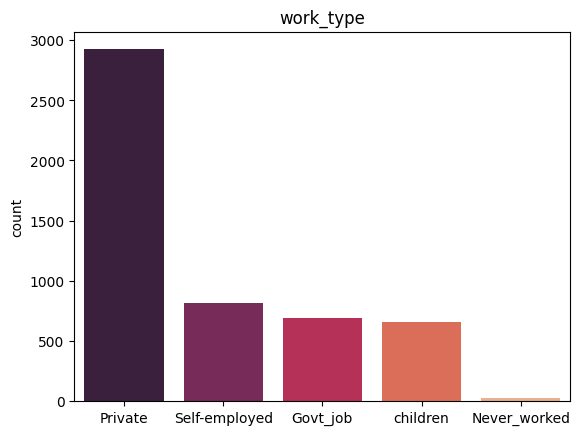

In [ ]:
sns.barplot(x = stroke_data["work_type"].unique(), y = stroke_data["work_type"].value_counts(), palette="rocket").set(title="work_type")

### Analysing Target Variable

[Text(0.5, 1.0, 'Stroke')]

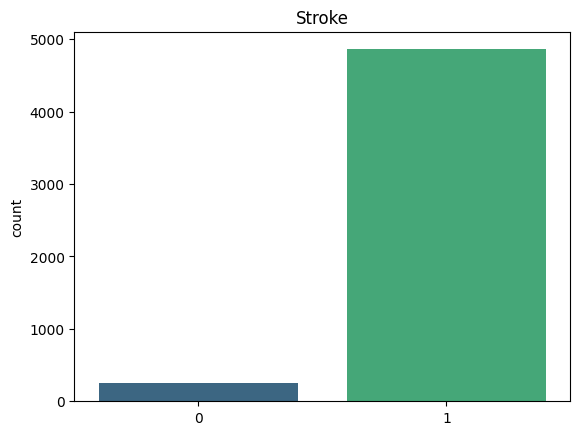

In [ ]:
# Get stroke counts and plot
stroke_data["stroke"].value_counts()
sns.barplot(x = stroke_data["stroke"].unique(), y = stroke_data["stroke"].value_counts(), palette="viridis").set(title="Stroke")

([<matplotlib.patches.Wedge at 0x7a279a0b4700>,
 [Text(-1.0871361453364168, 0.16773491438301516, '1'),
  Text(1.087136143373357, -0.1677349271061446, '0')])

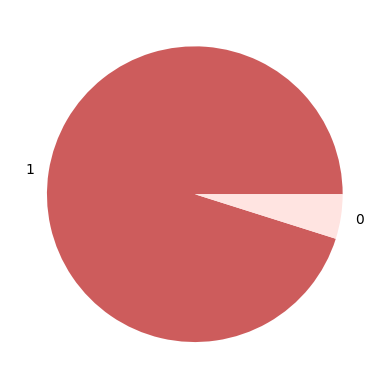

In [ ]:
# Plot as percentage
plt.pie(stroke_data["stroke"].value_counts(), labels=[1,0], colors=["indianred", "mistyrose"])

Ratio of 1s is 95.1%

**Exercises**

- Can you update the labels to "Stroke" and "No stroke" instead of "0" and "1"?
- Can you comment on the distribution of "Stroke" vs "No stroke" labels, how would this affect your predictive model?


# More advanced analytics

Often time, the intention of (3) Exploratory Data Analytics is to help you better shape your (2) Formulate Data Questions (Hypothesis). What we are looking for in this step is often the relationship between variables, more specifically the relationship between predictors (indepdendent variables) and the predicted (dependent variables).
- More often than not, we can draw significant insights from this step without any sophisticated predictive modeling, especially when data is limited.
- Even if you can use predictie modelling, these insights might be used to answer (to some extent) the questions of which factors are more influential in predicting certain variable, why these factors are more important etc. These questions are often more important (and more difficult) than being able to predict certain variables accurately.

## Correlation between numerical columns

<Axes: >

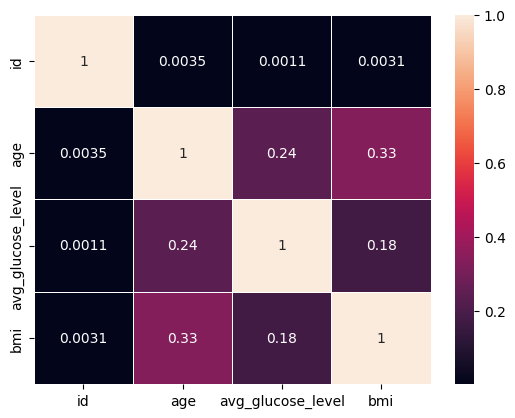

In [ ]:
sns.heatmap(stroke_data[numerical_cols].corr(), annot=True, linewidths=0.5,)

**Exercises**
- What is correlation coefficient? How is it computed and why it is important?
- Why we only compute corellation coefficients between numerical variables?
- Why is it important (or may not be important) to consider correlation between varibles? See here https://www.widsworldwide.org/get-inspired/blog/a-data-scientists-deep-dive-into-the-wids-datathon/



## Target Variable vs Numerical Attributes

In [ ]:
for col in numerical_cols:
    print(stroke_data.groupby("stroke").agg({col:"mean"}), end="\n\n")

                  id
stroke              
0       36487.236371
1       37115.068273

              age
stroke           
0       41.971545
1       67.728193

        avg_glucose_level
stroke                   
0              104.795513
1              132.544739

              bmi
stroke           
0       28.823064
1       30.471292



**Exercises**
- Can you visualize these results?
- What interpretation can you draw from these results?

## Target Variable vs Categorical Attributes

**Exercises**
- Can you repeat the computation above for categorical columns?
- Can you also plot the results?
- What insights can you draw from the results?

## Congratulations! You did it!

You have completed an Exploratory Data Analysis (EDA) on a real-life dataset of patients with potential strokes. Your progress so far is worth about one
or two semesters of college classes, or a few thousand dollars of data bootcamp :P. You can touch up your Jupyter notebook and showcase your report in your online portfolio!

See you next week in our machine learning course!
